# TUGAS PENGOLAHAN CITRA : KLASIFIKASI MOTIF BATIK
## NAMA ANGGOTA KELOMPOK :
* Nur Yahya (2109106073)
* Irfan Arman Hidayat (2109106098)

### FUNGSI PENERAPAN EDGE DETECTION CANNY PADA CITRA

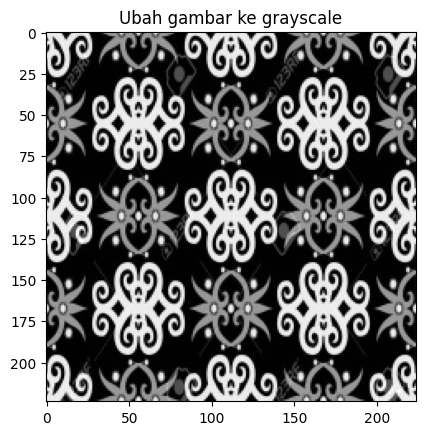

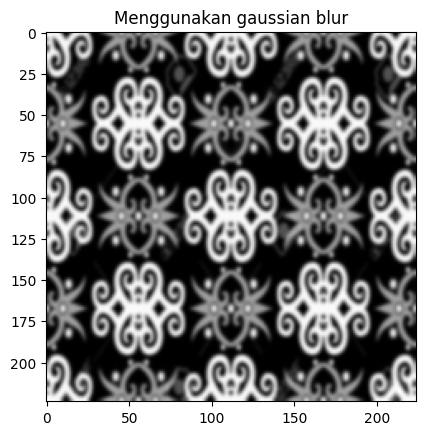

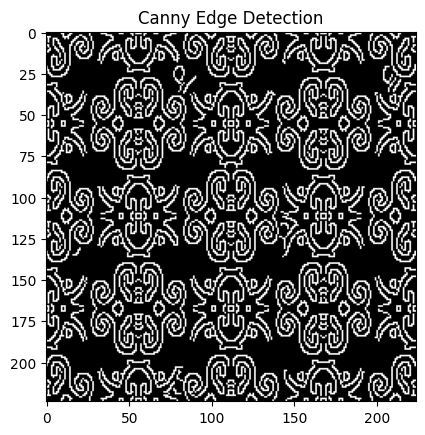

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan Sobel Edge Detection
def apply_canny(image_path):
    # Membaca gambar
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize gambar ke ukuran 224x224 untuk input ke CNN
    image = cv2.resize(image, (224, 224))

    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    canny_edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

    return canny_edges
dir_contoh = 'contoh batik.jpg'

# Contoh gambar batik
canny_image = apply_canny(dir_contoh)

#Plot grayscale
plt.imshow(cv2.imread(dir_contoh, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Ubah gambar ke grayscale')
plt.show()

#Plot gaussian blur
plt.imshow(cv2.GaussianBlur(cv2.imread(dir_contoh, cv2.IMREAD_GRAYSCALE), (5, 5), 0), cmap='gray')
plt.title('Menggunakan gaussian blur')
plt.show()


# Plot hasil Sobel
plt.imshow(canny_image, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


### FUNGSI LOAD DATASET, PEMBAGIAN TRAIN DAN TEST, SERTA PENENTUAN CLASS

In [2]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fungsi untuk memuat dataset dari direktori
def load_dataset_from_dir(data_dir, classes):
    images = []
    labels = []

    for label in classes:
        path = os.path.join(data_dir, label)
        class_index = classes.index(label)

        # Iterasi setiap gambar dalam direktori label
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            canny_img = apply_canny(img_path)

            # Simpan gambar dan labelnya
            images.append(canny_img)
            labels.append(class_index)

    return np.array(images), np.array(labels)

# Label kelas batik
classes = ['Batik Bali', 'Batik Dayak', 'Batik Parang']

# Load dataset train
X_train, y_train = load_dataset_from_dir('DATASET/TRAIN', classes)

# Load dataset test
X_test, y_test = load_dataset_from_dir('DATASET/TEST', classes)

# Normalisasi dataset ke rentang 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data agar sesuai dengan input CNN (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)  # 1 channel untuk grayscale
X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)

# Convert label ke one-hot encoding
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

### DATA GENERATOR

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
)
train_generator = datagen.flow(
    X_train,
    y_train,
    batch_size = 32,
    shuffle = True,
)

### MODEL ARSITEKTUR

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Cetak ringkasan model
model.summary()


C:\Users\Yha\B1-21\Yahya_073\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,634,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,793,603 (37.36 MB)

 Trainable params: 9,793,603 (37.36 MB)

 Non-trainable params: 0 (0.00 B)

### PELATIHAN MODEL

In [5]:
# Train model
history = model.fit(train_generator,
                  validation_data=(X_test, y_test),
                  epochs=50)


Epoch 1/50


C:\Users\Yha\B1-21\Yahya_073\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3460 - loss: 1.1245 - val_accuracy: 0.3167 - val_loss: 1.1242
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4196 - loss: 1.0828 - val_accuracy: 0.3333 - val_loss: 1.1158
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 992ms/step - accuracy: 0.3446 - loss: 1.1014 - val_accuracy: 0.3500 - val_loss: 1.0924
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 995ms/step - accuracy: 0.3107 - loss: 1.0856 - val_accuracy: 0.4167 - val_loss: 1.0849
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3825 - loss: 1.0750 - val_accuracy: 0.4333 - val_loss: 1.0774
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4797 - loss: 1.0512 - val_accuracy: 0.4167 - val_loss: 1.0792
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4340 - loss: 1.0483 - val_accuracy: 0.3167 - val_loss: 1.1491
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4418 - loss: 1.0559 - val_accuracy: 0.4500 - val_loss: 1.1153
Epoch 9/50
7/7 ━━━━

### EVALUASI MODEL

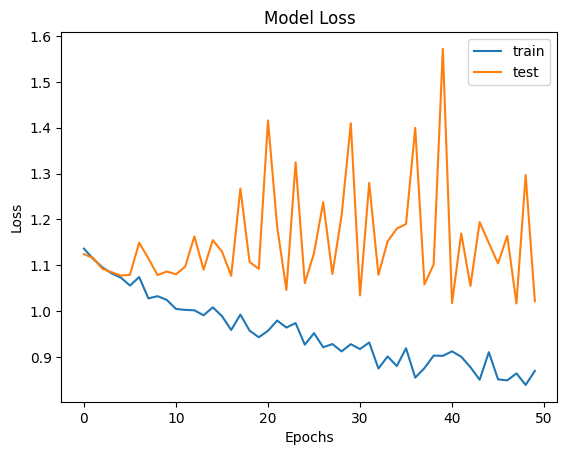

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

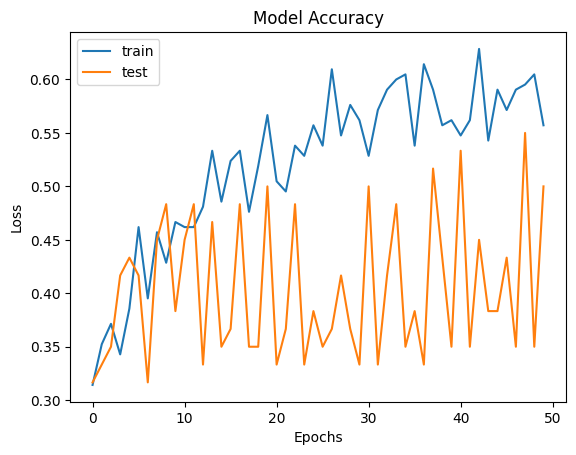

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### PREDIKSI MODEL TERHADAP GROUND TRUTH

In [8]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
true_digits = np.argmax(y_test, axis=1)

i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==10):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==10):
        break

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step


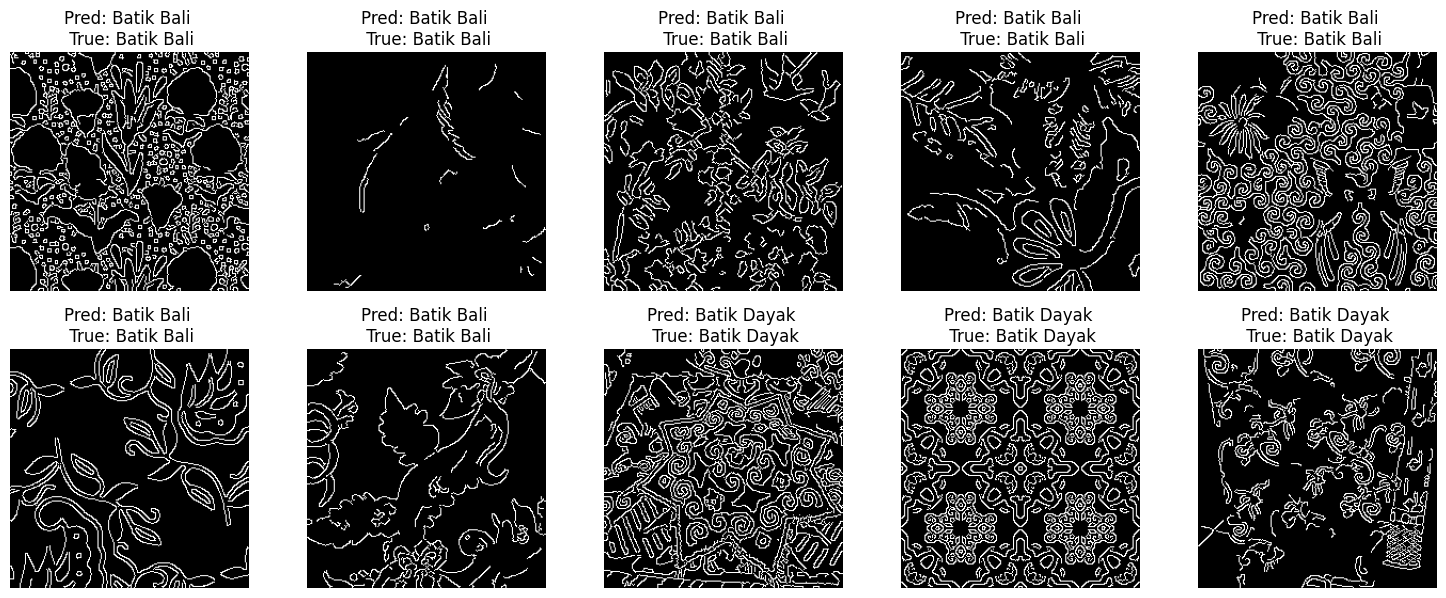

In [9]:
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[prop_class[i]], cmap='gray')
    pred_class = classes[pred_digits[prop_class[i]]]  # Konversi prediksi ke nama kelas
    true_class = classes[true_digits[prop_class[i]]]  # Konversi label asli ke nama kelas

    # Menambahkan judul dengan prediksi dan label sebenarnya
    plt.title(f"Pred: {pred_class} \n True: {true_class}")
    plt.axis('off')  # Hilangkan sumbu

plt.tight_layout()
plt.show()

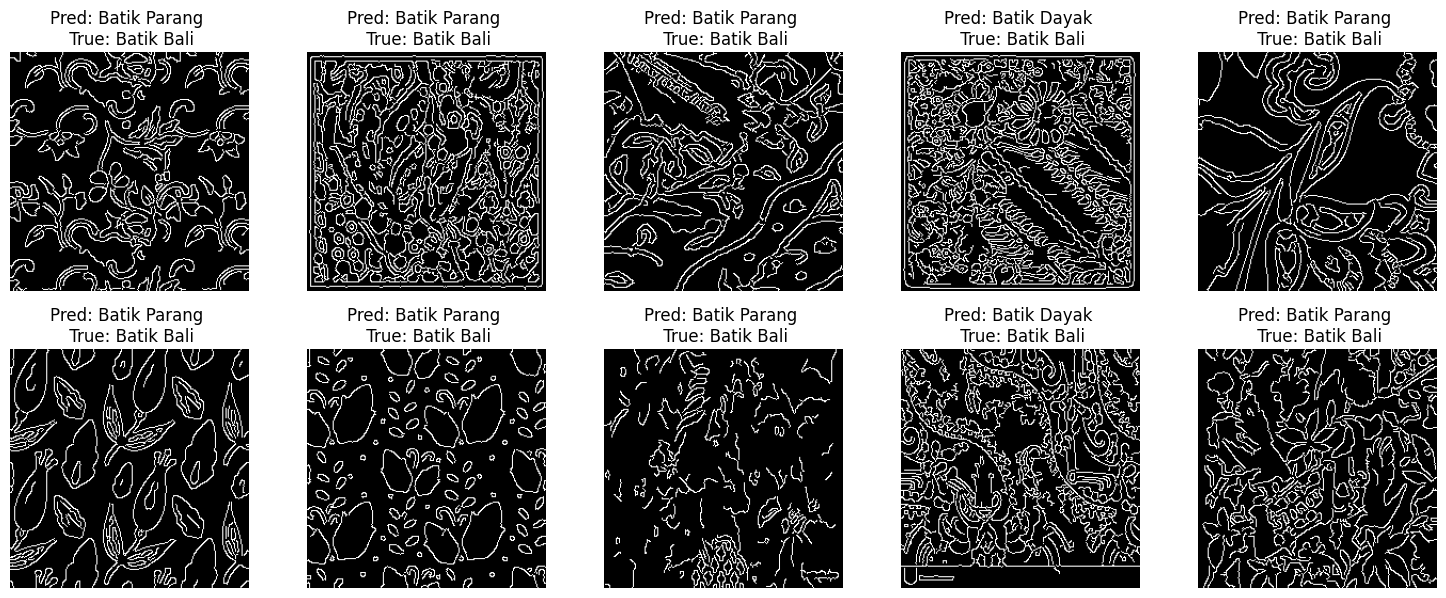

In [10]:
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[mis_class[i]], cmap='gray')
    pred_class = classes[pred_digits[mis_class[i]]]  # Konversi prediksi ke nama kelas
    true_class = classes[true_digits[mis_class[i]]]  # Konversi label asli ke nama kelas

    # Menambahkan judul dengan prediksi dan label sebenarnya
    plt.title(f"Pred: {pred_class} \n True: {true_class}")
    plt.axis('off')  # Hilangkan sumbu

plt.tight_layout()
plt.show()